In [7]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import utils as u

PROJECT_ROOT = Path("../..").resolve()
RUNS_DIR = PROJECT_ROOT / "02_simulation" / "runs" / "ex_01_moderation_fraction"
run_dirs = sorted(RUNS_DIR.glob("run_*"))

In [ ]:
statepoints = []
for run_dir in run_dirs:
    statepoints.append(openmc.StatePoint(u.find_statepoint(run_dir)))

[<openmc.statepoint.StatePoint object at 0x7109d92489d0>, <openmc.statepoint.StatePoint object at 0x710971d4fc10>, <openmc.statepoint.StatePoint object at 0x710972167f50>, <openmc.statepoint.StatePoint object at 0x710971d51f10>, <openmc.statepoint.StatePoint object at 0x710971db69d0>, <openmc.statepoint.StatePoint object at 0x7109713e50d0>, <openmc.statepoint.StatePoint object at 0x7109713e7110>, <openmc.statepoint.StatePoint object at 0x7109713e7890>, <openmc.statepoint.StatePoint object at 0x7109713ffa90>, <openmc.statepoint.StatePoint object at 0x71097140e090>, <openmc.statepoint.StatePoint object at 0x71097140f790>, <openmc.statepoint.StatePoint object at 0x710971416a50>, <openmc.statepoint.StatePoint object at 0x710971417290>, <openmc.statepoint.StatePoint object at 0x71097141f350>, <openmc.statepoint.StatePoint object at 0x71097141fc90>]


In [11]:
sp = statepoints[0]

In [12]:
fuel_flux = sp.get_tally(name="fuel_flux_spectrum")

fuel_flux_vals = fuel_flux.mean.flatten()
fuel_flux_std = fuel_flux.std_dev.flatten()

energy_filter = fuel_flux.find_filter(openmc.EnergyFilter)
energy_bins = np.unique(energy_filter.bins)
bin_widths = energy_bins[1:] - energy_bins[:-1]

bin_widths = energy_bins[1:] - energy_bins[:-1]
phi_E = fuel_flux_vals / bin_widths

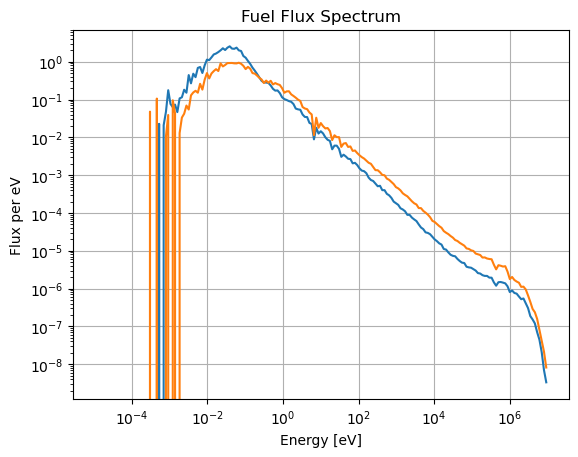

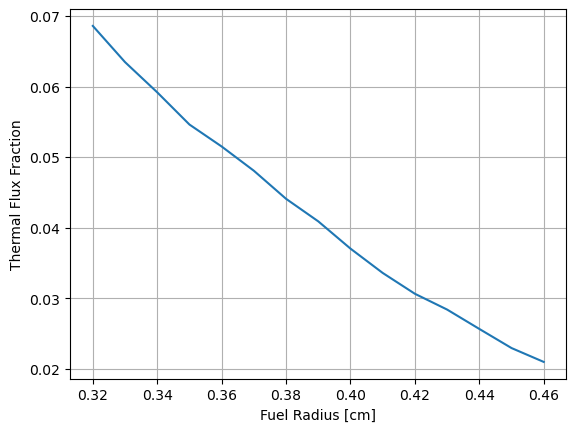

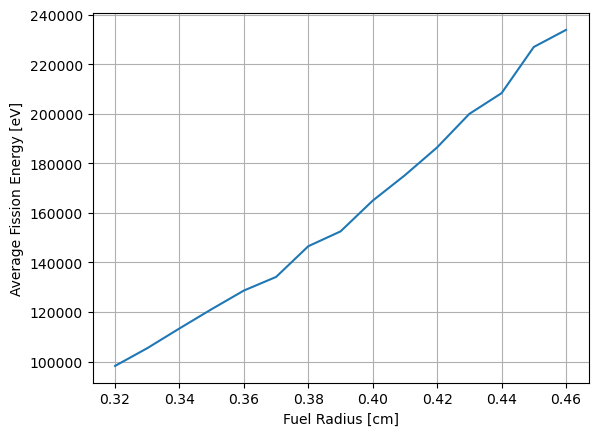

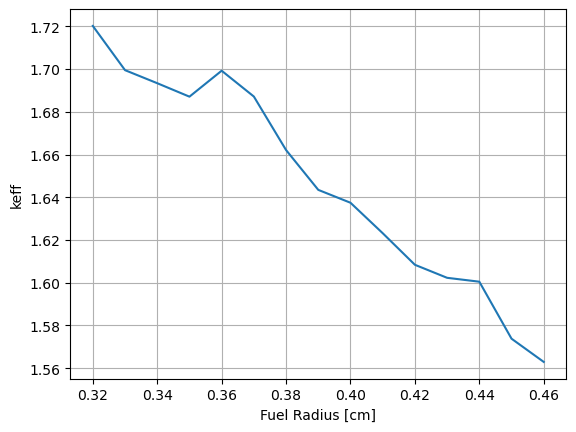

In [26]:
phi_Es = []
thermal_flux_fractions = []
avg_fission_energies = []
keffs = []

fuel_radii = [0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46]

for sp in statepoints:

    # Fuel flux spectrum analysis
    fuel_flux = sp.get_tally(name="fuel_flux_spectrum")

    fuel_flux_vals = fuel_flux.mean.flatten()
    fuel_flux_std = fuel_flux.std_dev.flatten()

    energy_filter = fuel_flux.find_filter(openmc.EnergyFilter)
    energy_bins = np.unique(energy_filter.bins)
    bin_widths = energy_bins[1:] - energy_bins[:-1]

    bin_widths = energy_bins[1:] - energy_bins[:-1]
    phi_E = fuel_flux_vals / bin_widths
    phi_Es.append(phi_E)

    bin_centers = 0.5 * (energy_bins[:-1] + energy_bins[1:])

    # Thermal flux fraction
    E_THERMAL = 0.625  # eV
    thermal_mask = energy_bins[:-1] < E_THERMAL

    thermal_flux = fuel_flux_vals[thermal_mask].sum()
    total_flux = fuel_flux_vals.sum()
    thermal_flux_fraction = thermal_flux / total_flux

    thermal_flux_fractions.append(thermal_flux_fraction)

    # Fission energy
    fission = sp.get_tally(name="fission_energy")
    fission_vals = fission.mean.flatten()

    avg_fission_energy = np.sum(bin_centers * fission_vals) / np.sum(fission_vals)
    avg_fission_energies.append(avg_fission_energy)

    # keff
    keffs.append(float(sp.keff.n))

plt.figure()
plt.loglog(bin_centers, phi_Es[0])
plt.loglog(bin_centers, phi_Es[-1])
plt.xlabel("Energy [eV]")
plt.ylabel("Flux per eV")
plt.title("Fuel Flux Spectrum")
plt.grid(True)

plt.figure()
plt.plot(fuel_radii, thermal_flux_fractions)
plt.xlabel("Fuel Radius [cm]")
plt.ylabel("Thermal Flux Fraction")
plt.grid(True)

plt.figure()
plt.plot(fuel_radii, avg_fission_energies)
plt.xlabel("Fuel Radius [cm]")
plt.ylabel("Average Fission Energy [eV]")
plt.grid(True)

plt.figure()
plt.plot(fuel_radii, keffs)
plt.xlabel("Fuel Radius [cm]")
plt.ylabel("keff")
plt.grid(True)